In [ ]:
# automated versions of these scripts have been saved in code/scripts-winter2023/ships-data-munging folder!

In [1]:
# import...
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import warnings
import sys
import pandas as pd
import datetime
import math
from matplotlib.dates import DateFormatter

os.chdir(  "/Users/etmu9498/research/code/scripts-winter2023")
import helper_fns_winter2023 as helper_fns
os.chdir(  "/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import eyewall_metadata

In [2]:
# part 1.0: process data from SHIPS dataset to set up for 2021 intensification analysis
# 6/5/23 edit: we can now look at 2022 data using this method, too!

# define tc names used in this analysis
tcnames_orig = [ 'fred', 'grace', 'henri', 'ida', 'sam']
tcnames = []
# only keep first 4 letters to match the format of the ships data
for i in range(len( tcnames_orig)):
    tcnames.append( tcnames_orig[i][0:4].upper())

year = '2021'


# load the full ships dataset
print( "Loading SHIPS dataset")
os.chdir(  "/Users/etmu9498/research/data/ships/")

# file1 = open('lsdiaga_1982_2021_sat_ts_5day.txt', 'r') # old data
file1 = open('lsdiaga_1982_2022_sat_ts.dat', 'r') # new 2022 data!
Lines = file1.readlines()
# there are a bunch of lines in the total ships file!!
print( "SHIPS dataset created")
print( "Number of lines in dataset: " + str( len( Lines)))

# lists of lists holding important date, intensity, etc information for each tc of interest!
all_dates = []
all_time_since_start = []
all_datetimes = []

all_vmax = []
all_psurf = []
all_shearmag = []
all_sheardir = []

all_startdate = []
all_starttime = []

# do this for each tc name listed above
for strname in tcnames:
    # convenient variables for plotting
    dates = []
    time_since_start = []
    datetimes = []
    vmax = []
    psurf = []
    shearmag = []
    sheardir = []
    startdate = 0
    starttime = 0

    header_inds = []
    # go through all the lines
    for ind in range( len( Lines)):
        # get the heading lines, and look for this TC's cases!
        if 'HEAD' and strname  in Lines[ ind]:
            # only keep 2021 cases
            if Lines[ ind][ 6 : 8] == str( year[ 2:4]):
                header_inds.append( ind)

    # print valid header indices
    # print( header_inds)
    # do this for all headers
    for headeri, headerval in enumerate( header_inds):
        # add times to the list! increments of 6 hours
        if headeri == 0:
            time_since_start.append( 0)
            # append starting dates and times
            for i in range( headerval,  len( Lines) ):
                if 'HEAD' in Lines[ i]:
                    startdate = Lines[i][6:12]
                    starttime = Lines[i][13:15]
                    break
            print( 'start date and time updated')
        else:
            # otherwise, find the most recent time and add 6 hours!
            time_since_start.append( time_since_start[-1] + 6)

        # add dates
        for i in range( headerval,  len( Lines) ):
            if 'HEAD' in Lines[ i]:
                dates.append( Lines[i][6:12] )
                break
        # add datetime objects!!
        for i in range( headerval,  len( Lines) ):
            if 'HEAD' in Lines[ i]:
                month = int( Lines[i][8:10] )
                day = int( Lines[i][10:12] )
                hours = int( Lines[i][13:15] )
                datetime_orig = datetime.datetime( int( year), month, day, hours)
                datetimes.append( datetime_orig) # datetime_orig.strftime( "%m/%d %Hh"))
                break
        # search for vmax!
        for i in range( headerval,  len( Lines) ):
            if 'VMAX' in Lines[i]:
                vmax.append( int( Lines[i][12 : 15]) ) # the last 3 vals for vmax at 0 hours
                break
        # repeat for pressure
        for i in range( headerval,  len( Lines) ):
            if 'MSLP' in Lines[i]:
                psurf.append( int( Lines[i][11:15] )  ) # the last 3 vals for vmax at 0 hours
                break
        # repeat for shear mag and direction
        for i in range( headerval,  len( Lines) ):
            if 'SHRD' in Lines[i]:
                shearmag.append( np.round( float( Lines[i][11:15] ) / 10, 2) ) # the last 3 vals for vmax at 0 hours
                break
        for i in range( headerval,  len( Lines) ):
            if 'SHTD' in Lines[i]:
                sheardir.append( int( Lines[i][11 : 15]) ) # the last 3 vals for vmax at 0 hours
                break

    # once done looping through the headers, append the list of dates, pressures, etc to the all_ lists
    all_dates.append( dates)
    all_time_since_start.append( time_since_start)
    all_datetimes.append( datetimes)

    all_vmax.append( vmax)
    all_psurf.append( psurf)
    all_shearmag.append( shearmag)
    all_sheardir.append( sheardir)

    all_startdate.append( startdate)
    all_starttime.append( starttime)

'''
# testing
print(len(all_psurf))
print(tcnames)
print(all_psurf)

i = 0
print(tcnames[i])
print(all_datetimes[i])
'''

Loading SHIPS dataset
SHIPS dataset created
Number of lines in dataset: 1925150
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated


'\n# testing\nprint(len(all_psurf))\nprint(tcnames)\nprint(all_psurf)\n\ni = 0\nprint(tcnames[i])\nprint(all_datetimes[i])\n'

In [3]:
# part 1.0: process data from SHIPS dataset to set up for 2021 intensification analysis
# 6/5/23 edit: we can now look at 2022 data using this method, too!

# define tc names used in this analysis
tcnames_orig_22 = ['earl', 'fiona', 'ian', 'julia']
tcnames22 = []
# only keep first 4 letters to match the format of the ships data
for i in range(len( tcnames_orig_22)):
    tcnames22.append( tcnames_orig_22[i][0:4].upper())

year = '2022'


# load the full ships dataset
print( "Loading SHIPS dataset")
os.chdir(  "/Users/etmu9498/research/data/ships/")

# file1 = open('lsdiaga_1982_2021_sat_ts_5day.txt', 'r') # old data
file1 = open('lsdiaga_1982_2022_sat_ts.dat', 'r') # new 2022 data!
Lines = file1.readlines()
# there are a bunch of lines in the total ships file!!
print( "SHIPS dataset created")
print( "Number of lines in dataset: " + str( len( Lines)))

# lists of lists holding important date, intensity, etc information for each tc of interest!
all_dates22 = []
all_time_since_start22 = []
all_datetimes22 = []

all_vmax22 = []
all_psurf22 = []
all_shearmag22 = []
all_sheardir22 = []

all_startdate22 = []
all_starttime22 = []

# do this for both years 
for yeari in range(len(year)):
    # do this for each tc name listed above
    for strname in tcnames22:
        # convenient variables for plotting
        dates = []
        time_since_start = []
        datetimes = []
        vmax = []
        psurf = []
        shearmag = []
        sheardir = []
        startdate = 0
        starttime = 0

        header_inds = []
        # go through all the lines
        for ind in range( len( Lines)):
            # get the heading lines, and look for this TC's cases!
            if 'HEAD' and strname  in Lines[ ind]:
                # only keep 2021 cases
                if Lines[ ind][ 6 : 8] == str( year[ 2:4]):
                    header_inds.append( ind)

        # print valid header indices
        # print( header_inds)
        # do this for all headers
        for headeri, headerval in enumerate( header_inds):
            # add times to the list! increments of 6 hours
            if headeri == 0:
                time_since_start.append( 0)
                # append starting dates and times
                for i in range( headerval,  len( Lines) ):
                    if 'HEAD' in Lines[ i]:
                        startdate = Lines[i][6:12]
                        starttime = Lines[i][13:15]
                        break
                print( 'start date and time updated')
            else:
                # otherwise, find the most recent time and add 6 hours!
                time_since_start.append( time_since_start[-1] + 6)

            # add dates
            for i in range( headerval,  len( Lines) ):
                if 'HEAD' in Lines[ i]:
                    dates.append( Lines[i][6:12] )
                    break
            # add datetime objects!!
            for i in range( headerval,  len( Lines) ):
                if 'HEAD' in Lines[ i]:
                    month = int( Lines[i][8:10] )
                    day = int( Lines[i][10:12] )
                    hours = int( Lines[i][13:15] )
                    datetime_orig = datetime.datetime( int( year), month, day, hours)
                    datetimes.append( datetime_orig) # datetime_orig.strftime( "%m/%d %Hh"))
                    break
            # search for vmax!
            for i in range( headerval,  len( Lines) ):
                if 'VMAX' in Lines[i]:
                    vmax.append( int( Lines[i][12 : 15]) ) # the last 3 vals for vmax at 0 hours
                    break
            # repeat for pressure
            for i in range( headerval,  len( Lines) ):
                if 'MSLP' in Lines[i]:
                    psurf.append( int( Lines[i][11:15] )  ) # the last 3 vals for vmax at 0 hours
                    break
            # repeat for shear mag and direction
            for i in range( headerval,  len( Lines) ):
                if 'SHRD' in Lines[i]:
                    shearmag.append( np.round( float( Lines[i][11:15] ) / 10, 2) ) # the last 3 vals for vmax at 0 hours
                    break
            for i in range( headerval,  len( Lines) ):
                if 'SHTD' in Lines[i]:
                    sheardir.append( int( Lines[i][11 : 15]) ) # the last 3 vals for vmax at 0 hours
                    break

        # once done looping through the headers, append the list of dates, pressures, etc to the all_ lists
        all_dates22.append( dates)
        all_time_since_start22.append( time_since_start)
        all_datetimes22.append( datetimes)

        all_vmax22.append( vmax)
        all_psurf22.append( psurf)
        all_shearmag22.append( shearmag)
        all_sheardir22.append( sheardir)

        all_startdate22.append( startdate)
        all_starttime22.append( starttime)

Loading SHIPS dataset
SHIPS dataset created
Number of lines in dataset: 1925150
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated


In [4]:
# testing

'''
# print(len(all_psurf22))
# print(tcnames22)
# print(all_psurf22)

i = 2
print(tcnames22[i])

print(len(all_datetimes22[i]))
print(len(all_shearmag22[i]))
print(len(all_sheardir22[i]))

print(all_datetimes22[i])
print(all_shearmag22[i])

for j in range(len(all_datetimes22[i])):
    print(all_datetimes22[i][j])
    print(all_shearmag22[i][j])
    
'''

'\n# print(len(all_psurf22))\n# print(tcnames22)\n# print(all_psurf22)\n\ni = 2\nprint(tcnames22[i])\n\nprint(len(all_datetimes22[i]))\nprint(len(all_shearmag22[i]))\nprint(len(all_sheardir22[i]))\n\nprint(all_datetimes22[i])\nprint(all_shearmag22[i])\n\nfor j in range(len(all_datetimes22[i])):\n    print(all_datetimes22[i][j])\n    print(all_shearmag22[i][j])\n    \n'

Fred
22
22
22
Plot for TC Fred Created
Grace
34
34
34
Plot for TC Grace Created
Henri
32
32
32
Plot for TC Henri Created
Ida
24
24
24
Plot for TC Ida Created
Sam
50
50
50
Plot for TC Sam Created


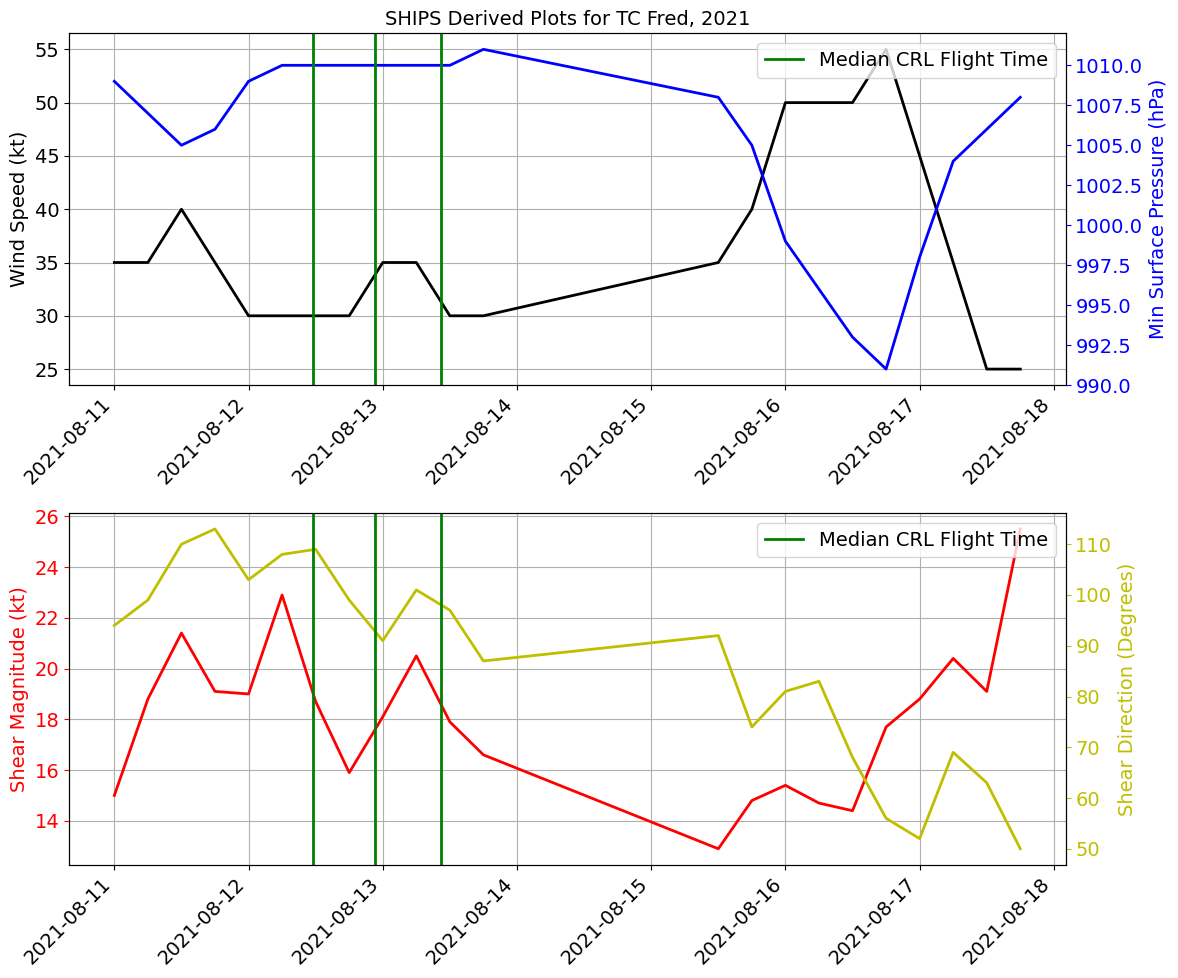

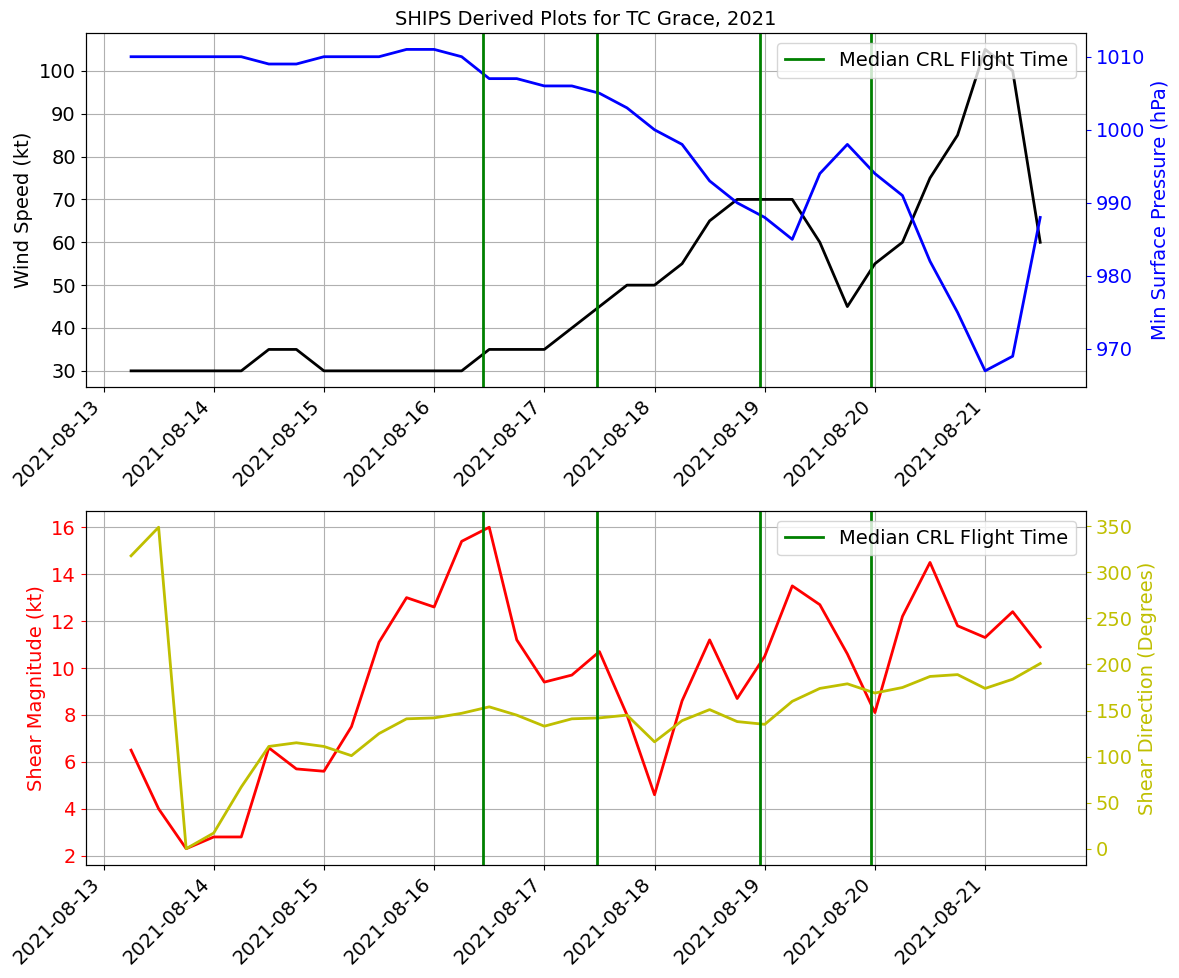

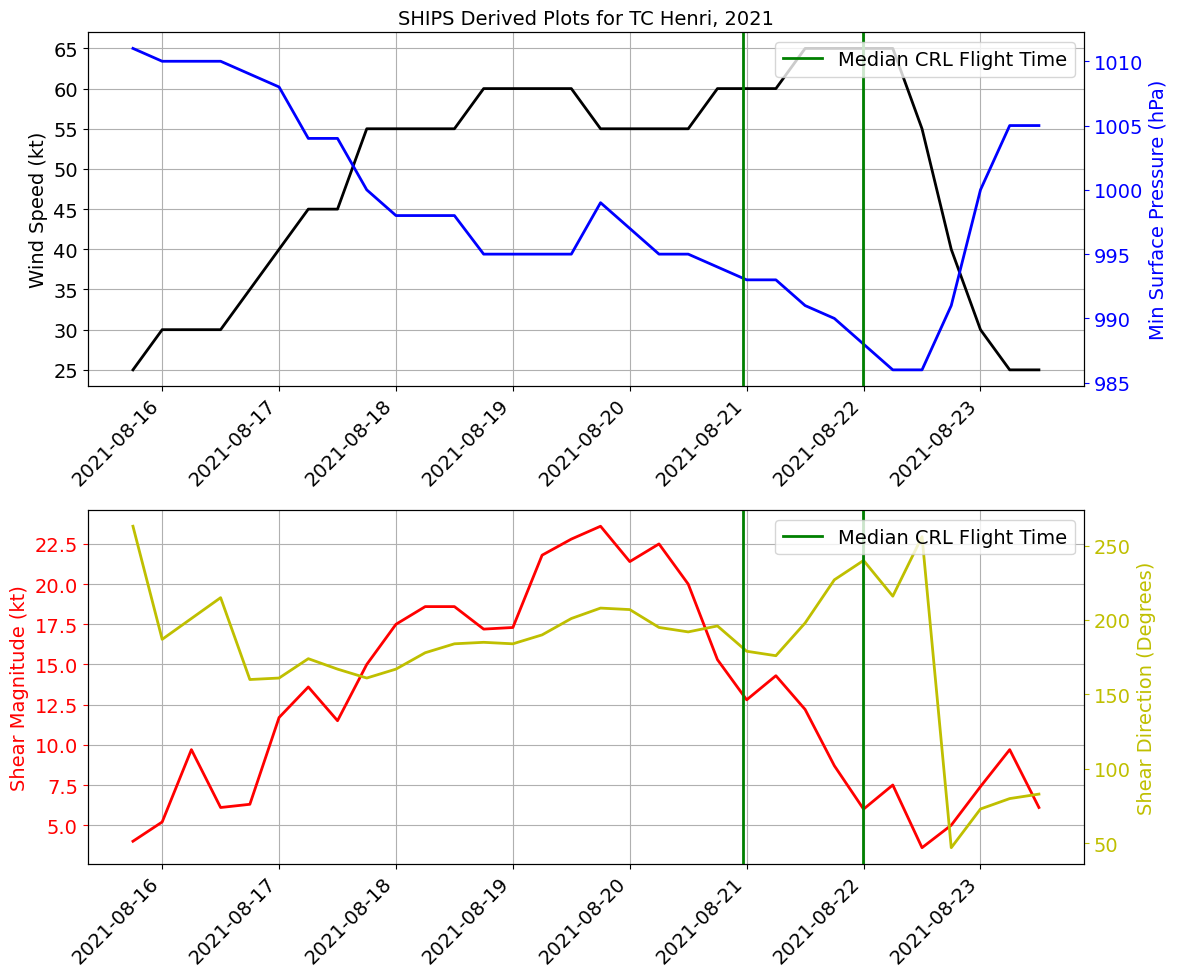

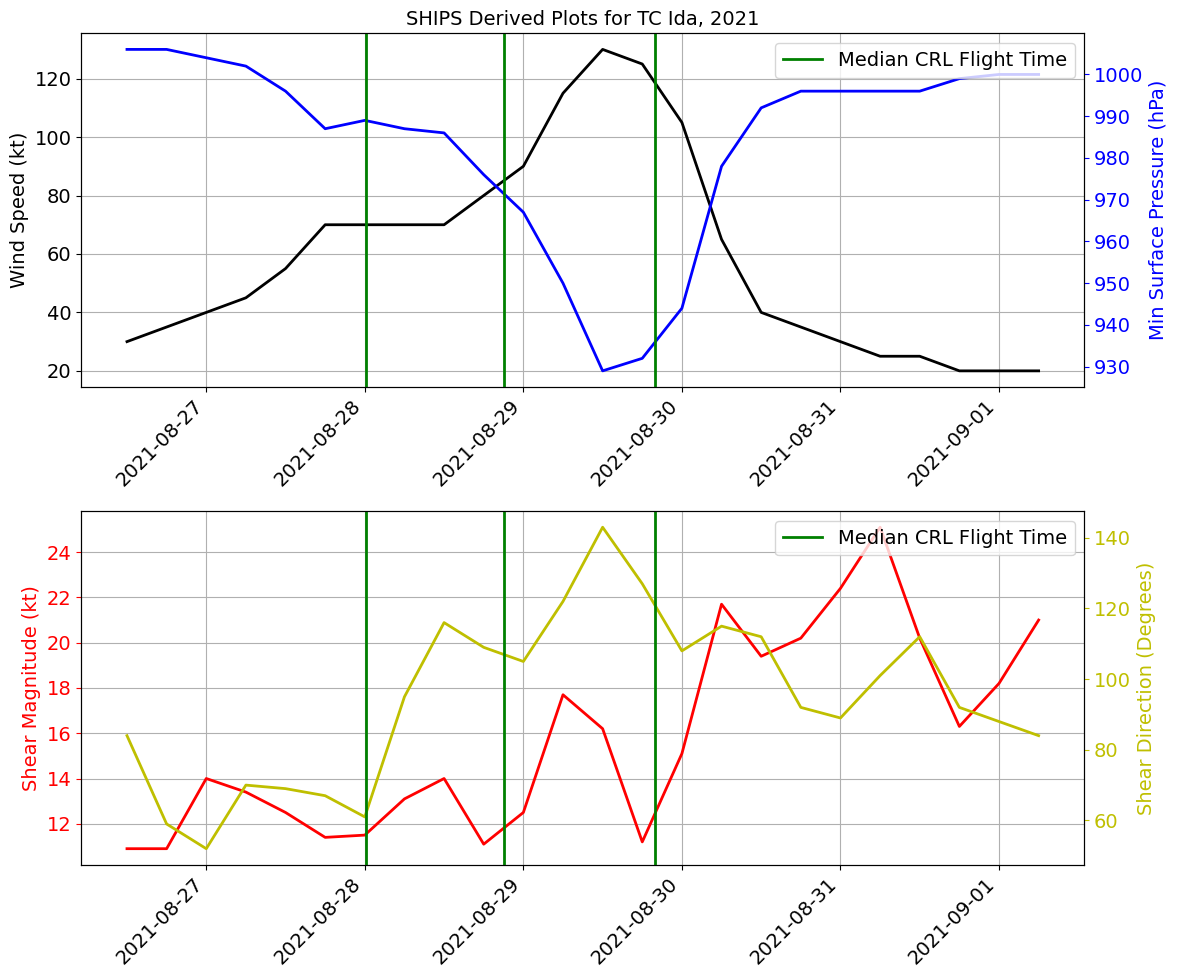

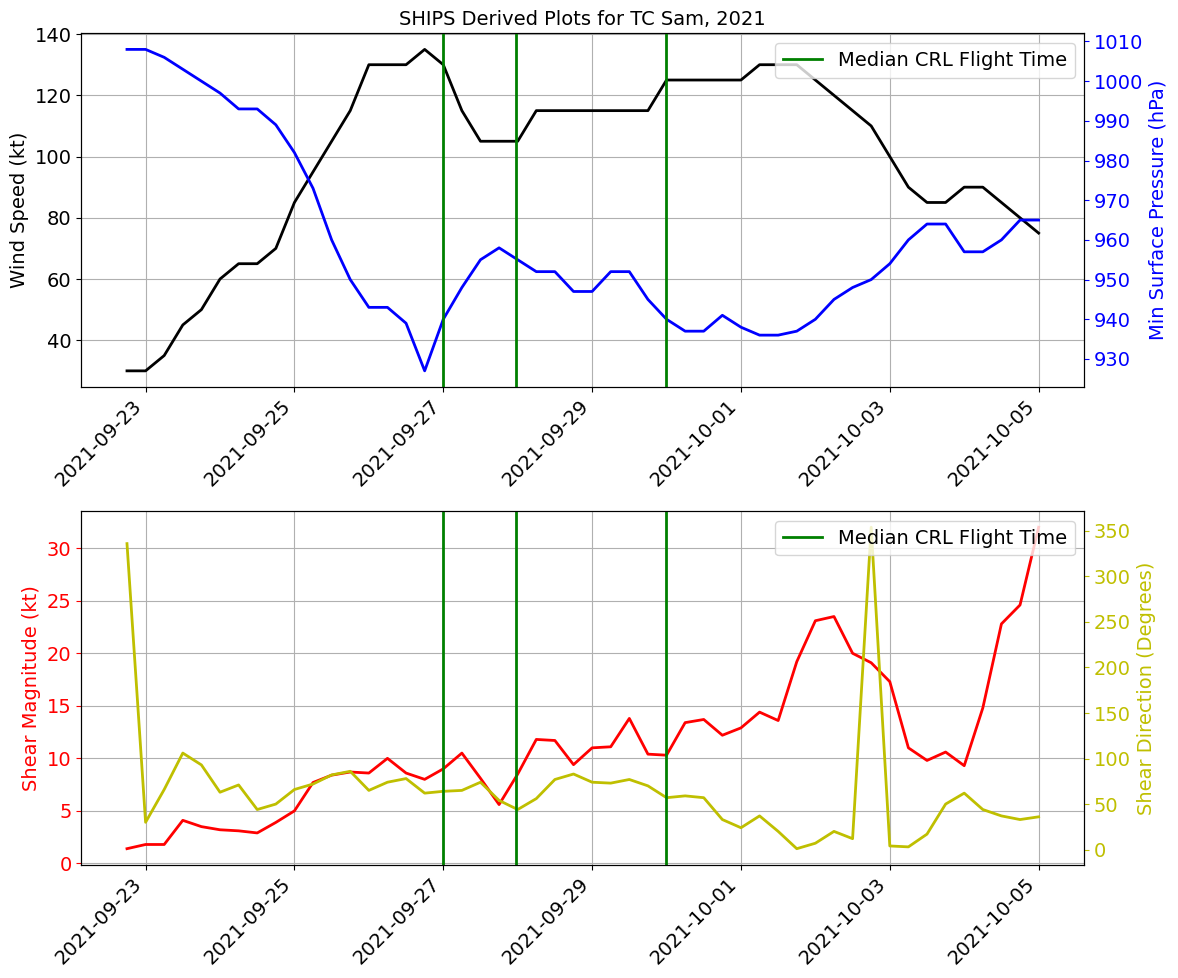

In [10]:
year = '2021'
if year == '2021':
    names = tcnames_orig
elif year == '2022':
    names = tcnames_orig_22

# load crl metadata here
metadata = eyewall_metadata.all_metadata()


# goal #1:
# create lines showing TC sampling median times!
# save them below
crl_times = []

# get a list of crl data names for this year
yeartemp, crl_list = helper_fns.get_crl_datasets(tc=year)
crl_list = crl_list[0]

# iterate through each tc name here- add to certain plots. starts empty
tcname = ''

# cycle through each date / dataset. load the crl data, find the mean time, and add it to the plot!
for datei, dateval in enumerate(metadata[year]['names']):        
    # datasets to skip plotting for: no valid eye passes
    if year == '2021' and ( dateval == '0811' or dateval == '0925'):
        continue
    elif year == '2022' and ( dateval == '0830' or dateval == '0831'):
        continue
    
    # get crl data
    crl_name = crl_list[datei]
    os.chdir("/Users/etmu9498/research/data/crl-all-data-processed/" + year + "/")
        
    crl_data = xr.open_dataset(crl_name)
    
    # get the median time for the dataset
    middlei = math.ceil( len(crl_data.time.values) / 2)
    middlet = crl_data.time.values[middlei]
    
    # overlap time: reset and increment the date
    if middlet > 24.:        
        # not the proper way to cycle through dates, but this should work for this specific case! may need to fix later
        # if month is 1-9, need to add a zero in front to get indexing to work!
        if dateval[0] == '0':
            dateval = '0' + str( int(dateval) + 1)
        else:
            dateval = str( int(dateval) + 1)
        
        middlet -= 24.
    
    # convert date string and time decimal to a datetime
    month = int( dateval[0:2] )
    day = int( dateval[2:4] )
    hours = int( np.floor( middlet))
    minutes = int( np.floor( ( middlet - np.floor(middlet)) * 60))
    datetime_orig = datetime.datetime( int( year), month, day, hours, minutes) 
        
    # add crl time to the list
    # case 1: a new tc name. add a new list
    if tcname != metadata[year]['names'][dateval]:
        crl_times.append([datetime_orig])
        tcname = metadata[year]['names'][dateval]
    else:
        crl_times[-1].append(datetime_orig)

        
        
        
# goal 2: make intensity plots for 2021 and 2022 data to confirm that data processing steps went well!   
for tci, tcname in enumerate(names):
    if year == '2021':
        datetimes = all_datetimes[tci]
        vmax = all_vmax[tci]
        psurf = all_psurf[tci]
        shearmag = all_shearmag[tci]
        sheardir = all_sheardir[tci]
    elif year == '2022':
        datetimes = all_datetimes22[tci]
        vmax = all_vmax22[tci]
        psurf = all_psurf22[tci]
        shearmag = all_shearmag22[tci]
        sheardir = all_sheardir22[tci]
    tcname = names[tci].title()

    print(tcname)
    # special case: trim down ian's last two timesteps (from october, not sept -> causes issues)
    print(len(datetimes))
    if tcname == 'Ian':
        datetimes = datetimes[:len(datetimes)-4]
        vmax = vmax[:len(vmax)-4]
        psurf = psurf[:len(psurf)-4]
        shearmag = shearmag[:len(shearmag)-4]
        sheardir = sheardir[:len(sheardir)-4]
        
    plt.figure( figsize = (12, 10))
    helper_fns.change_font_sizes( 14, 14)
    lw = 2
    n = 4  # Keep every 4th label
    
    plt.subplot(211)
    plt.title( "SHIPS Derived Plots for TC " + tcname + ", " + year)
    plt.plot( datetimes, vmax, c='k', linewidth=lw)
    plt.ylabel( "Wind Speed (kt)")
    plt.xticks(rotation=45, ha="right")

    plt.grid('on')
    
    ax = plt.gca()
    fig = plt.gcf()
    fig.tight_layout()
    
    ax2 = ax.twinx()
    ax2.plot( datetimes, psurf, c='b', linewidth=lw)
    ax2.set_ylabel( "Min Surface Pressure (hPa)")
    ax2.set_xlabel('Date')
    ax2.yaxis.label.set_color('b')          #setting up Y-axis label color to blue
    ax2.tick_params(axis='y', colors='b')    #setting up X-axis tick color to red

    # trimming down the number of x labels
    labels = ax.xaxis.get_ticklabels()
    # for di, dateval in enumerate(datetimes):    
    #     # remove all labels not at 0 utc
    #     if dateval[-3:-1] != '00':
    #         labels[di].set_visible(False)

    for datei in range(len(crl_times[tci])):        
        if datei == 0:
            plt.axvline(x=crl_times[tci][datei], c='g', linewidth=2, label="Median CRL Flight Time")
        else:
            plt.axvline(x=crl_times[tci][datei], c='g', linewidth=2)
    plt.legend(loc='upper right')

    
    plt.subplot(212)
    
    print(len( datetimes))
    print(len( shearmag))
    plt.plot( datetimes, shearmag, c='r', linewidth=lw)
    plt.ylabel( "Shear Magnitude (kt)")
    plt.xticks(rotation=45, ha="right")
    plt.grid('on')
    ax = plt.gca()
    ax.yaxis.label.set_color('r')          #setting up Y-axis label color to blue
    ax.tick_params(axis='y', colors='r')    #setting up X-axis tick color to red
    fig = plt.gcf()
    fig.tight_layout()

    ax2 = ax.twinx()
    ax2.plot( datetimes, sheardir, c='y', linewidth=lw)
    ax2.set_ylabel( "Shear Direction (Degrees)")
    ax2.set_xlabel('Date')
    ax2.yaxis.label.set_color('y')          #setting up Y-axis label color to blue
    ax2.tick_params(axis='y', colors='y')    #setting up X-axis tick color to red
    
    # trimming down the number of x labels
    labels = ax.xaxis.get_ticklabels()
    # for di, dateval in enumerate(datetimes):    
    #     # remove all labels not at 0 utc
    #     if dateval[-3:-1] != '00':
    #         labels[di].set_visible(False)

    # old attempts at setting xlabels
    # [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    # change the datetime format on the x axis to just dates
    # myFmt = DateFormatter('%m/%d')
    # ax.xaxis.set_major_formatter(myFmt)    
    
    # 5/26/23 code: add vertical lines for crl data!
    # add a flight line to the plot!
        
    for datei in range(len(crl_times[tci])):        
        if datei == 0:
            plt.axvline(x=crl_times[tci][datei], c='g', linewidth=2, label="Median CRL Flight Time")
        else:
            plt.axvline(x=crl_times[tci][datei], c='g', linewidth=2)
    plt.legend(loc='upper right')
    
    print("Plot for TC " + tcname + " Created")

In [11]:
# helper fn used below
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot)), items.index( min(items, key=lambda x: abs(x - pivot)))

# part 3: actually calculate intensification for each crl dataset!
# for this test, i'll be looking at intensification changes centered at penetration time (-12 h to +12 h from flight)
intensification = []
# save shear values for each day here
shearmag_totals = []
sheardir_totals = []

# cycle through each storm / every date for that storm
for tci, tcval in enumerate(names):
    # get datetimes and vmaxs for this cyclone!
    if year == '2021':
        datetimes = all_datetimes[tci]
        vmax = all_vmax[tci]
        shearmag = all_shearmag[tci]
        sheardir = all_sheardir[tci]
    elif year == '2022':
        datetimes = all_datetimes22[tci]
        vmax = all_vmax22[tci]
        shearmag = all_shearmag22[tci]
        sheardir = all_sheardir22[tci]
    tcname = names[tci].title()

    # find the closest datetime! 
    for datei, middletime in enumerate(crl_times[tci]):
        dt_close, i = nearest(datetimes, middletime)
                
        # issue: print out an error when there's no ships data available for a flight (before formation / after dissipation)
        # no data within 6 hours of flight...
        if abs( (middletime-dt_close).total_seconds() / 3600) > 6.:
            print("No SHIPS data available for this point. Skipping this case.")
            shearmag_totals.append(np.nan)
            sheardir_totals.append(np.nan)
            intensification.append(np.nan)
            continue
                
        shearmag_totals.append(shearmag[i])
        sheardir_totals.append(sheardir[i])
        
        # otherwise, find intensity change! Final intensity 12h later (+2 inds) - starting intensity 12h before (-2 inds)
        # get index of current time
        intensification.append(vmax[i+2] - vmax[i-2])
        
        # testing
        # print(middletime)
        # print(dt_close)
        # print((middletime-dt_close).total_seconds() / 3600)
        # print('\n')
        # print(datetimes[i])
        # print(vmax[i+2])
        # print(vmax[i-2])
        
print("Intensification Rates:")
print(intensification)
print("Shear Magnitudes:")
print(shearmag_totals)
print("Shear Directions:")
print(sheardir_totals)

Intensification Rates:
[5, 0, 0, 5, 15, -5, 15, 10, -10, 15, 60, -50, -25, 10, 10]
Shear Magnitudes:
[18.7, 18.1, 17.9, 16.0, 10.7, 10.5, 8.1, 12.8, 6.0, 11.5, 12.5, 11.2, 9.0, 8.5, 10.3]
Shear Directions:
[109, 91, 97, 154, 142, 135, 169, 179, 240, 61, 105, 127, 64, 44, 57]


In [8]:
print( metadata['2021']['intensification'])

{'0811': nan, '0812am': 5, '0812pm': 0, '0813': 0, '0816': 5, '0817': 15, '0818': -5, '0819': 15, '0820': 10, '0821': -10, '0827': 15, '0828': 60, '0829': -50, '0925': nan, '0926': -25, '0927': 10, '0929': 10}
